# Indian Food EDA


## This workbook uses a dataset of 255 traditional and famous dishes from India.
https://www.kaggle.com/nehaprabhavalkar/indian-food-101

---

In [61]:
# importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,8
sns.set(style='darkgrid')

In [3]:
# reading in data
food = pd.read_csv('C:\\Users\\Nick\\Documents\\GitHub\\Indian_food_project\\raw_data\\indian_food.csv')

In [8]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [7]:
food.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


---

## Data Cleaning

In [9]:
# change to UK spelling

food.rename(columns = {'flavor_profile':'flavour_profile'}, inplace = True)

In [10]:
# Missing values are identified by '-1', I will change them to NaN.

food = food.replace(-1, np.nan)
food = food.replace('-1', np.nan)

In [14]:
# changing columns to be categorical 

food.diet = food.diet.astype('category')
food.flavour_profile = food.flavour_profile.astype('category')
food.course = food.course.astype('category')
food.state = food.state.astype('category')
food.region = food.region.astype('category')

---

## Data Exploration

In [15]:
# checking how many unique values there are in all columns 

food.nunique()

name               255
ingredients        252
diet                 2
prep_time           21
cook_time           18
flavour_profile      4
course               4
state               24
region               6
dtype: int64

In [17]:
# Checking how many unique values there are in the course column

food.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [18]:
# Checking how many unique values there are in the diet column

food.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [19]:
# Checking how many unique values there are in the flavour profile column

food.flavour_profile.value_counts()

spicy     133
sweet      88
bitter      4
sour        1
Name: flavour_profile, dtype: int64

---

## Visualisations

### 1) Different Diet Types

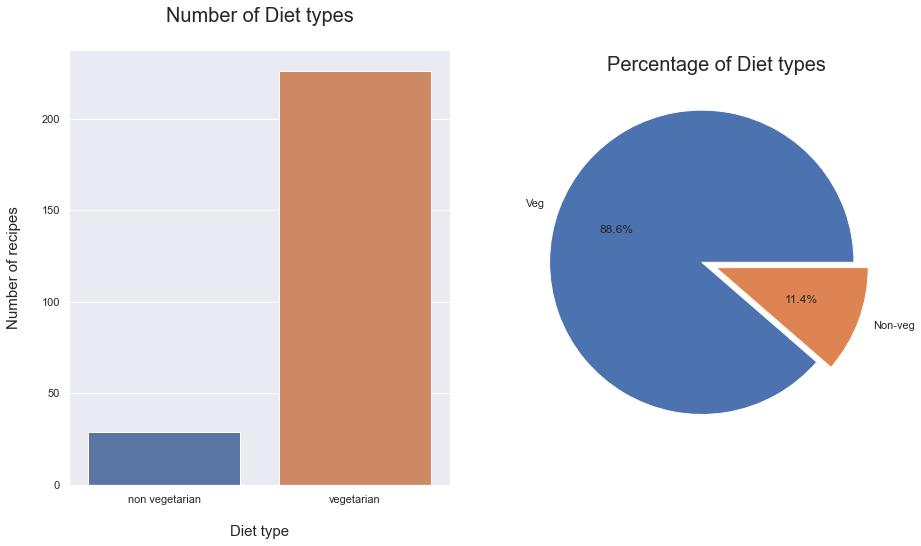

In [62]:
# Number of different diet types

plt.subplot(1,2,1)
sns.countplot(food.diet)
plt.title('Number of Diet types\n', size = 20)
plt.xlabel('\nDiet type', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)


plt.subplot(1,2,2)
x = food.diet.value_counts()
explode = [0.1,0]
labels = ['Veg', 'Non-veg']
plt.pie(x, explode = explode, labels = labels, autopct = '%1.1f%%')
plt.title("Percentage of Diet types", size = 20)
plt.show()

*There is a very obvious split, with the majority of the dishes in the dataset being vegetarian.*

### 2) Types of Courses

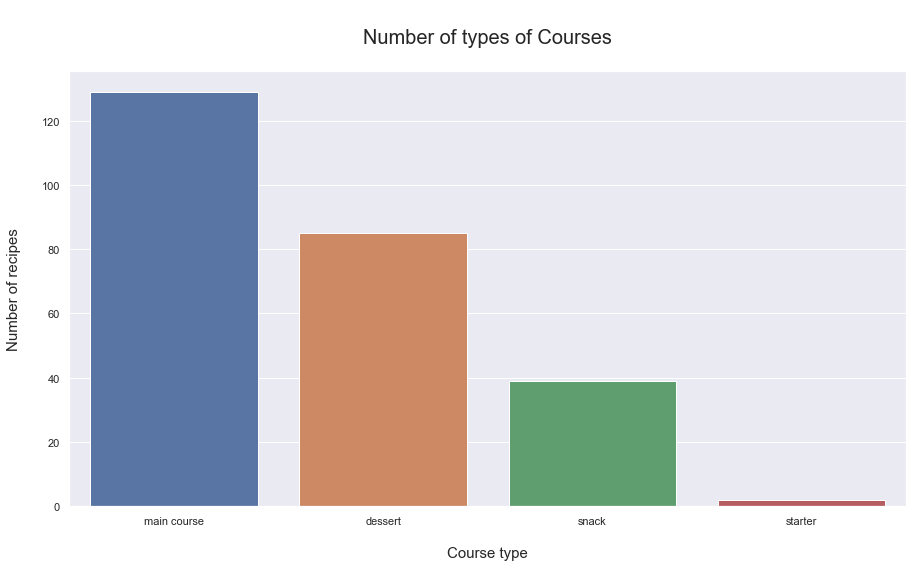

In [90]:

# count of course types

sns.countplot(food.course, order = food.course.value_counts().index)
plt.title('\nNumber of types of Courses\n', size = 20)
plt.xlabel('\nCourse type', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.show()

*Main courses are the most numerous course in the dataset.*

### 3) Types of different flavours

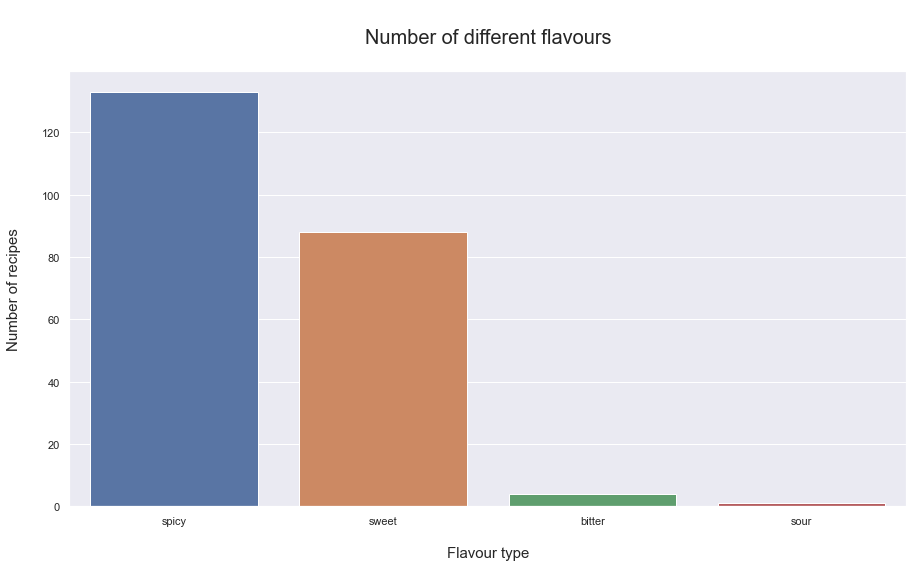

In [89]:

# count of flavour profile types

sns.countplot(food.flavour_profile, order = food.flavour_profile.value_counts().index)
plt.title('\nNumber of different flavours\n', size = 20)
plt.xlabel('\nFlavour type', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.show()

*Spicy dishes are the most common in the dataset.*

### 4) Number of dishes per Region

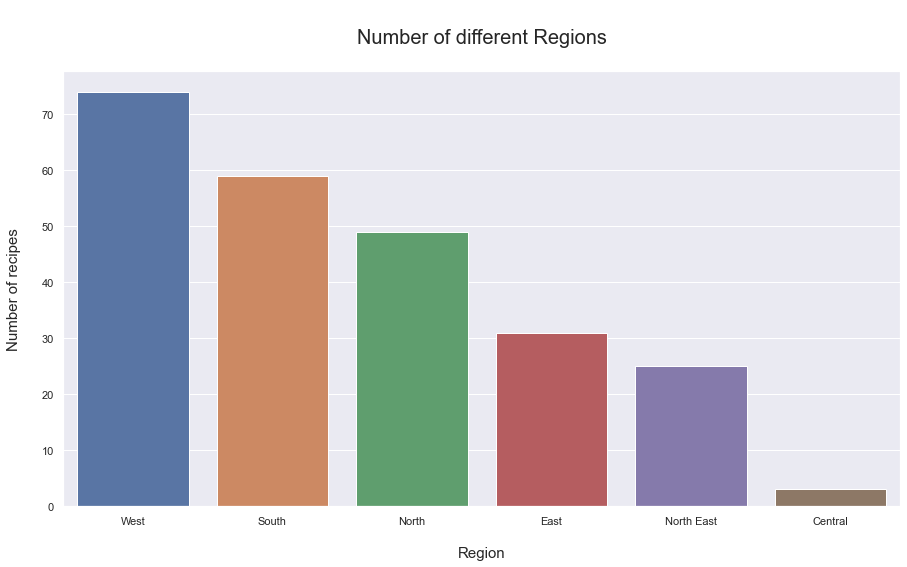

In [88]:

# count of region types

sns.countplot(food.region, order = food.region.value_counts().index)
plt.title('\nNumber of different Regions\n', size = 20)
plt.xlabel('\nRegion', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.show()

*Dishes from the west region of India is the most represented in this dataset.*

### 5) Number of recipes per State

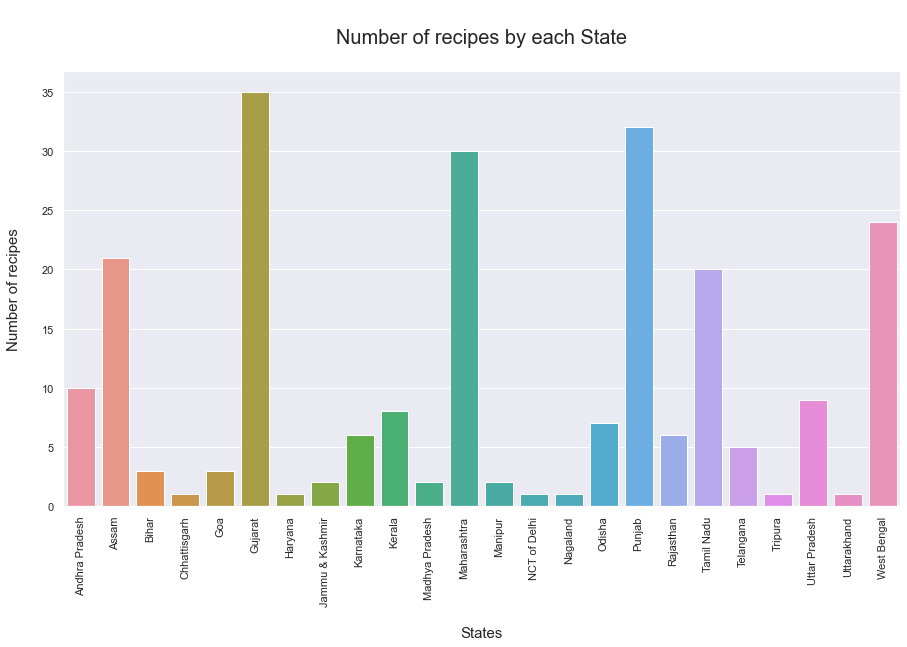

In [122]:
sns.countplot(food.state)
plt.xticks(rotation = 90)
plt.title('\nNumber of recipes by each State\n', size = 20)
plt.xlabel('\nStates', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.show()

### 6) How Diet type varies in different Regions

In [57]:

# counting the number of recipes in each region per diet type

region_diet = food.pivot_table(values = 'name', index = 'region', columns = 'diet', aggfunc = 'count')
region_diet

diet,non vegetarian,vegetarian
region,,
Central,NaN,3.0
East,5.0,26.0
North,5.0,44.0
North East,13.0,12.0
South,3.0,56.0
West,3.0,71.0


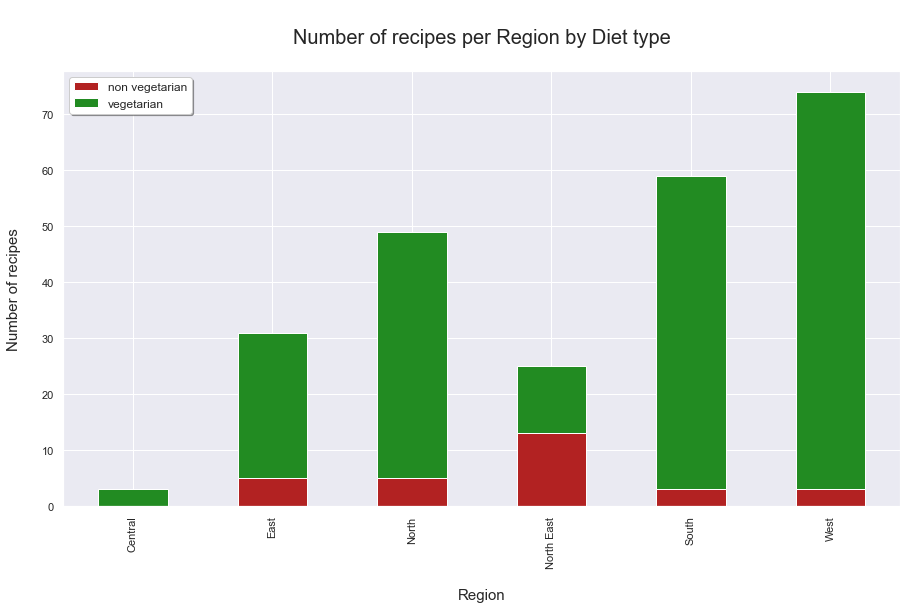

In [87]:
region_diet.plot(kind = 'bar', stacked = True, color = ['firebrick', 'forestgreen'])
plt.title('\nNumber of recipes per Region by Diet type\n', size = 20)
plt.xlabel('\nRegion', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.legend(fontsize = 12, fancybox = True, shadow = True, facecolor = 'white')
plt.show()

*The north east region of India have the largest proportion of non-vegetarian dishes in the dataset.*

### 7) How Diet type varies in the different States

In [123]:

# crosstab of how many recipes are produced by each State in the dataset by diet type
pd.crosstab(food.state, food.diet).style.bar(color='lightcoral')

diet,non vegetarian,vegetarian
state,,
Andhra Pradesh,0,10
Assam,10,11
Bihar,0,3
Chhattisgarh,0,1
Goa,1,2
Gujarat,0,35
Haryana,0,1
Jammu & Kashmir,0,2
Karnataka,0,6


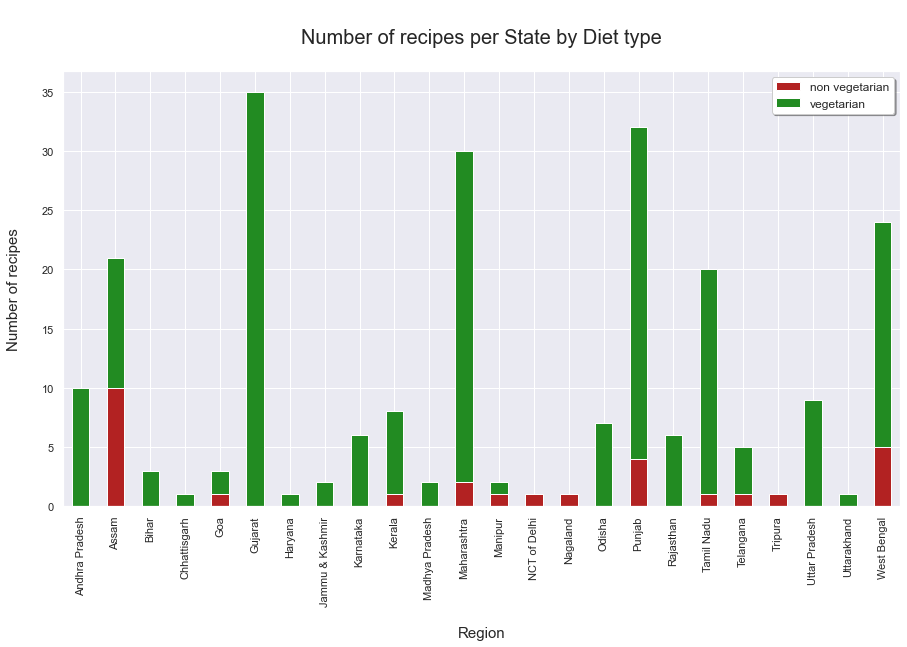

In [124]:
state_diet = food.pivot_table(values = 'name', index = 'state', columns = 'diet', aggfunc = 'count')

state_diet.plot(kind = 'bar', stacked = True, color = ['firebrick', 'forestgreen'])
plt.title('\nNumber of recipes per State by Diet type\n', size = 20)
plt.xlabel('\nRegion', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.legend(fontsize = 12, fancybox = True, shadow = True, facecolor = 'white')
plt.show()

*Proportionally Assam produces the most non-vegetarian dishes, whilst there are several states that only contribute vegetarian dishes to this dataset.*

### 7) How the proportion of recipes in each Region vary by course type

In [93]:

## counting the number of recipes in each region per course type
region_course = food.pivot_table(values = 'name', index = 'region', columns = 'course', aggfunc = 'count')
region_course

course,dessert,main course,snack,starter
region,,,,
Central,1.0,1.0,1.0,NaN
East,21.0,10.0,NaN,NaN
North,9.0,37.0,1.0,2.0
North East,7.0,18.0,NaN,NaN
South,18.0,31.0,10.0,NaN
West,23.0,28.0,23.0,NaN


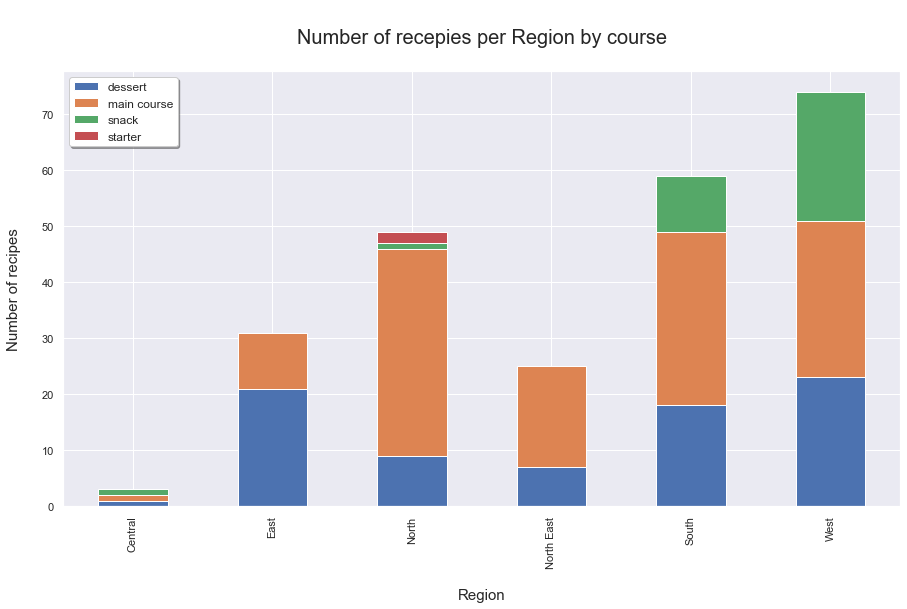

In [94]:
region_course.plot(kind = 'bar', stacked = True)
plt.title('\nNumber of recepies per Region by course\n', size = 20)
plt.xlabel('\nRegion', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.legend(fontsize = 12, fancybox = True, shadow = True, facecolor = 'white')
plt.show()

*There aren't very many starter dishes in this dataset, and all of them are from the North of the Country.  The highest proportion of desserts are to be found in the Eastern region.*

### 8) How the proportion of recipes in each Region vary by flavour type

In [96]:

### counting the number of recipes in each region per flavour type
region_flavour = food.pivot_table(values = 'name', index = 'region', columns = 'flavour_profile', aggfunc = 'count')
region_flavour

flavour_profile,bitter,sour,spicy,sweet
region,,,,
Central,NaN,NaN,2.0,1.0
East,NaN,NaN,6.0,22.0
North,2.0,NaN,35.0,10.0
North East,NaN,NaN,13.0,7.0
South,NaN,NaN,30.0,19.0
West,2.0,1.0,41.0,23.0


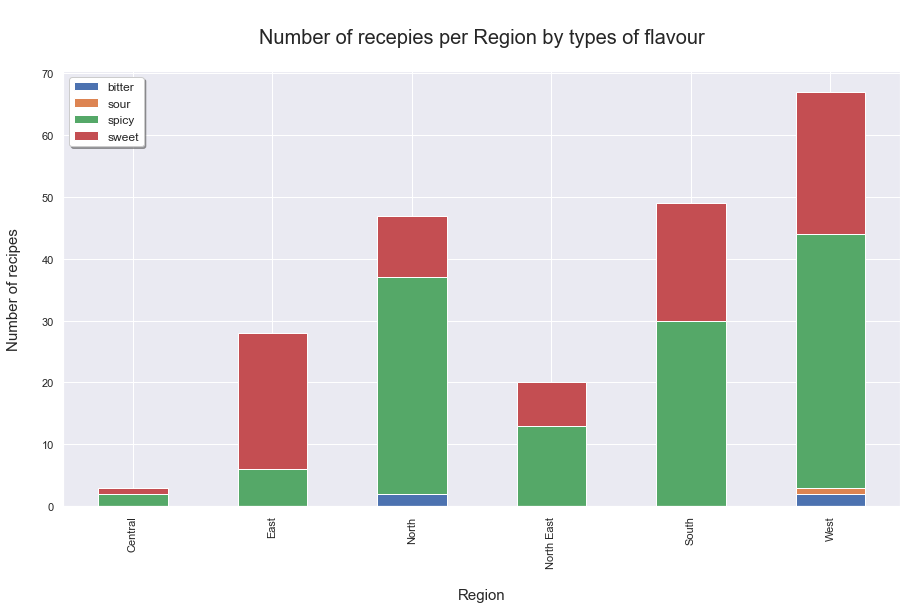

In [99]:
region_flavour.plot(kind = 'bar', stacked = True)
plt.title('\nNumber of recepies per Region by types of flavour\n', size = 20)
plt.xlabel('\nRegion', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.legend(fontsize = 12, fancybox = True, shadow = True, facecolor = 'white')
plt.show()

*By proportion of dishes present, the North of the country seems to have the least number of sweet dishes.  As expected from the last chart the East of the country has the most sweet dishes as it also has the highest proportion of dessert recipes.*

### 9) How preparation and cooking times vary by the type of course

In [105]:

# taking the mean of the times taken for prep and cooking
time_course = food.pivot_table(values = ['prep_time', 'cook_time'], index = 'course', aggfunc = np.mean)
time_course

,cook_time,prep_time
course,,
dessert,47.341772,29.961039
main course,35.272727,29.681818
snack,31.611111,56.388889
starter,37.500000,180.000000


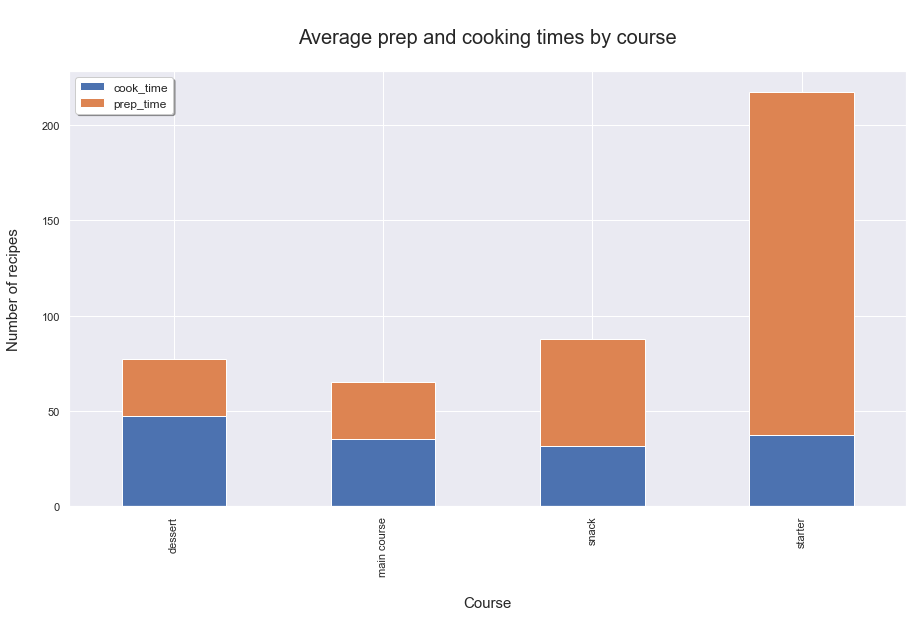

In [106]:
time_course.plot(kind = 'bar', stacked = True)
plt.title('\nAverage prep and cooking times by course\n', size = 20)
plt.xlabel('\nCourse', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.legend(fontsize = 12, fancybox = True, shadow = True, facecolor = 'white')
plt.show()

*Starter dishes seem to have a proportionally very long preparation time to cooking time, compared to other types of dishes.*

### 10) How preparation and cooking times vary by different flavour types

In [107]:
time_flavour = food.pivot_table(values = ['prep_time', 'cook_time'], index = 'flavour_profile', aggfunc = np.mean)
time_flavour

,cook_time,prep_time
flavour_profile,,
bitter,37.500000,15.000000
sour,10.000000,10.000000
spicy,35.543103,37.327586
sweet,47.439024,31.337500


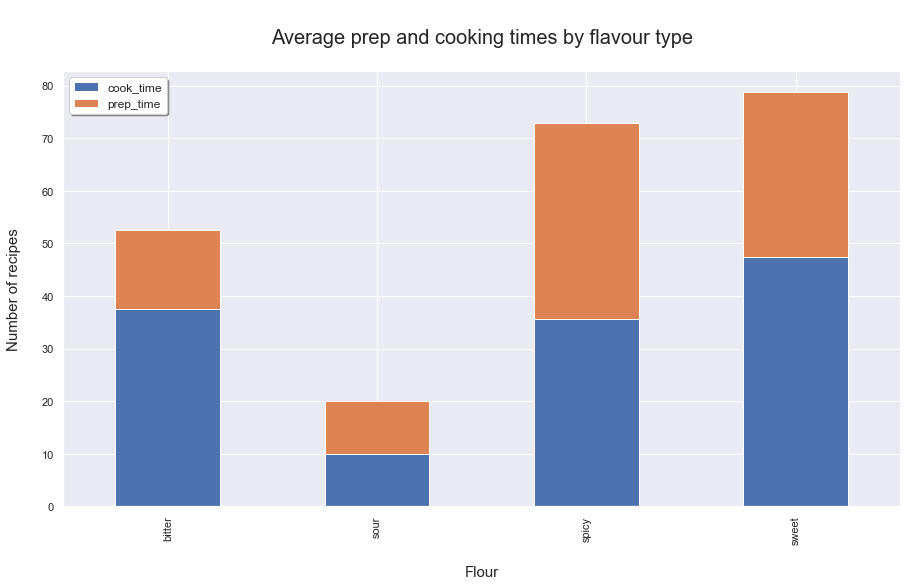

In [108]:
time_flavour.plot(kind = 'bar', stacked = True)
plt.title('\nAverage prep and cooking times by flavour type\n', size = 20)
plt.xlabel('\nFlour', fontsize = 15)
plt.ylabel('Number of recipes\n', size = 15)
plt.legend(fontsize = 12, fancybox = True, shadow = True, facecolor = 'white')
plt.show()

*Bitter recipes seem to proportionally have the least prep time to cooking time, with sweet dishes having the longest cooking time.*

### 11. 